<a href="https://colab.research.google.com/github/imazzala/matematicas-para-data-science-probabilidad/blob/main/Estimacion_densidad_probabilidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from matplotlib import pyplot
from numpy.random import normal
from scipy.stats import norm

Estimación Paramétrica


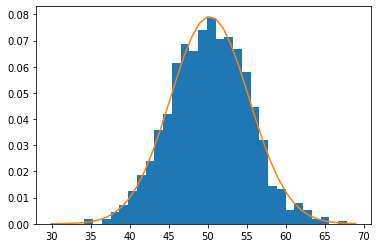

In [ ]:
#simulamos uno conjunto de datos con el objetivo de simular un conjunto de mediciones
#generador de datos basado en dist normal mu = 50, sigma = 5
sample = normal(loc = 50, scale = 5, size = 1000)

#Ajustamos una Distribución la cual suponemos normal, en función de los datos simulados
#Se calcula la media y el desvío estandard de los datos
mu = sample.mean()
sigma = sample.std()

#Se crea una instancia de una función de distribución normal con media mu y desvío sigma
dist = norm(mu, sigma)

#Se generan una serie de valores que se encuentra en el rango de los datos
values = [value for value in range(30,70)]
#Calculo las probabilidades de cada uno de los valores a través del objeto dist creado
probabilidades = [dist.pdf(value) for value in values]

pyplot.hist(sample, bins=30, density=True)
pyplot.plot(values, probabilities)
pyplot.show()

Estimación No Paramétrica

In [ ]:
#Contrucción de una función Bimodal
#KernelDensity es el método que se usa para estimar
from numpy import hstack
from sklearn.neighbors import KernelDensity

sample1 = normal(loc = 20, scale = 5, size = 300)
sample2 = normal(loc = 40, scale = 5, size = 700)
sample = hstack((sample1, sample2))

In [ ]:
#Aplicación del Ajuste a la distribución, bandwidth es el suavizado
model = KernelDensity(bandwidth = 2, kernel = 'gaussian')
sample = sample.reshape((len(sample), 1))
model.fit(sample)

KernelDensity(algorithm='auto', atol=0, bandwidth=2, breadth_first=True,
              kernel='gaussian', leaf_size=40, metric='euclidean',
              metric_params=None, rtol=0)

In [ ]:
values = np.asarray([value for value in range(1, 60)])
values = values.reshape((len(values), 1))
probabilities = model.score_samples(values) #probabilidad logarítmica para facilitar los calculos
probabilities = np.exp(probabilities)  # inversión de probabilidad obtenemos el valor original

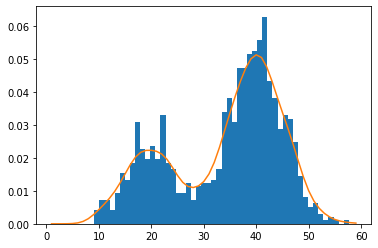

In [ ]:
pyplot.hist(sample, bins=50, density=True) 
pyplot.plot(values[:], probabilities)
pyplot.show()